<a href="https://colab.research.google.com/github/koteswardhulipalla1/MALNUTRION-DETECTION-USING-CNN/blob/main/SC_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# Path to the original zip file containing both train and valid data
original_zip_path = '/content/malnutrion dataset (2).zip'  # Change this to the actual path
extracted_dir = 'content'  # Path where you want to unzip the dataset

# Function to unzip the original file
def unzip_original_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted {zip_path} to {extract_to}")

# Unzip the original file
unzip_original_file(original_zip_path, extracted_dir)


Extracted /content/malnutrion dataset (2).zip to content


In [ ]:
import zipfile
import os

# Paths to the zip files
train_zip_path = '/content/content/Train.zip'  # Replace with the actual path
valid_zip_path = '/content/content/valid.zip'  # Replace with the actual path

# Directories where you want to extract the contents
train_extract_dir = 'path_to_train_data'  # Directory to extract train data
valid_extract_dir = 'path_to_valid_data'  # Directory to extract valid data

# Function to unzip a file
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted {zip_path} to {extract_to}")

# Unzip the train and valid files
unzip_file(train_zip_path, train_extract_dir)
unzip_file(valid_zip_path, valid_extract_dir)


Extracted /content/content/Train.zip to path_to_train_data
Extracted /content/content/valid.zip to path_to_valid_data


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
IMG_HEIGHT = 227
IMG_WIDTH = 227
BATCH_SIZE = 32

# Directories for train and valid data
train_dir = train_extract_dir
valid_dir = valid_extract_dir

# ImageDataGenerators for rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Change to 'categorical' for multi-class classification
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Change to 'categorical' for multi-class classification
)


Found 172 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [ ]:
  from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the AlexNet model architecture
def build_alexnet(input_shape):
    model = Sequential([
        Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3, 3), strides=2),

        Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3, 3), strides=2),

        Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
    ])
    return model

# Instantiate the model
model = build_alexnet((IMG_HEIGHT, IMG_WIDTH, 3))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
EPOCHS = 10  # You can increase this based on your data
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=valid_generator.samples // BATCH_SIZE
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.5544 - loss: 27.8619 - val_accuracy: 0.6400 - val_loss: 0.6882
Epoch 2/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.4375 - loss: 0.7126

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.4375 - loss: 0.7126 - val_accuracy: 0.2400 - val_loss: 0.6964
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.5972 - loss: 0.6754 - val_accuracy: 0.6400 - val_loss: 0.6877
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - accuracy: 0.7500 - loss: 0.5144 - val_accuracy: 0.4000 - val_loss: 0.7041
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.7220 - loss: 0.7382 - val_accuracy: 0.3600 - val_loss: 0.8818
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 421ms/step - accuracy: 0.6250 - loss: 0.9038 - val_accuracy: 0.3600 - val_loss: 0.8484
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - accuracy: 0.7043 - loss: 0.5864 - val_accuracy: 0.6000 - val_loss: 0.6830
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - accuracy: 0.8333 - loss: 0.4280 - val_accuracy: 0.4400 - val_loss: 0.7227
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.7906 - loss: 0.4621 - val_accuracy: 0.3600 - val_loss: 0.7449
Epoch 10/10

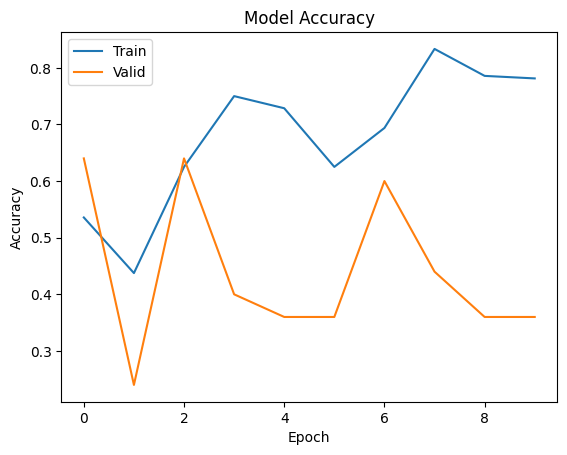

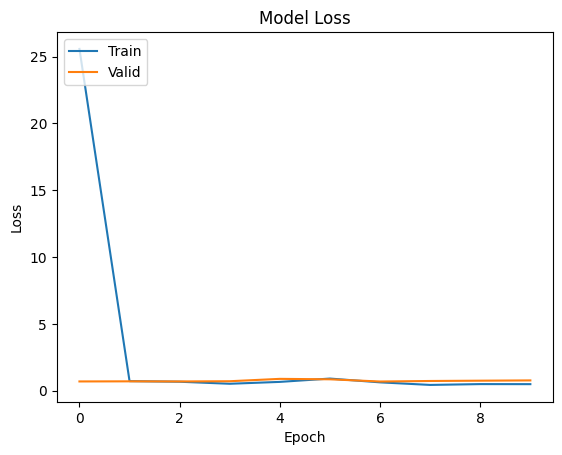

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


In [ ]:
# Save the entire model (architecture, weights, optimizer state)
model.save('malnutrition_alexnet_model.h5')  # Saving the model in .h5 format
print("Model saved successfully.")


Model saved successfully.


6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step

Training Set Metrics:
Accuracy: 0.51
Precision: 0.51
Recall: 0.99
F1 Score: 0.67
Confusion Matrix:
[[ 2 83]
 [ 1 86]]
True Positive (TP): 86
False Negative (FN): 1
False Positive (FP): 83
True Negative (TN): 2


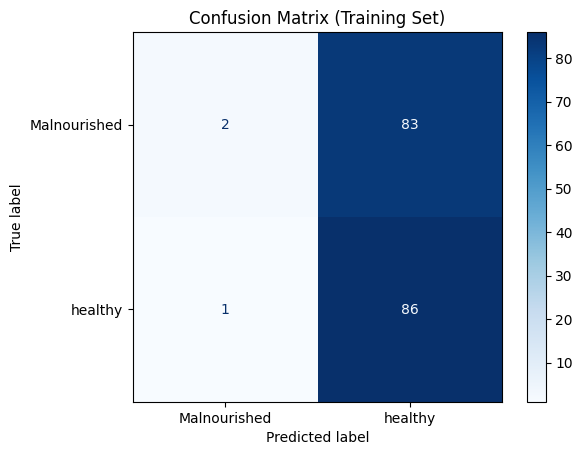

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step

Validation Set Metrics:
Accuracy: 0.36
Precision: 0.36
Recall: 1.00
F1 Score: 0.53
Confusion Matrix:
[[ 0 16]
 [ 0  9]]
True Positive (TP): 9
False Negative (FN): 0
False Positive (FP): 16
True Negative (TN): 0


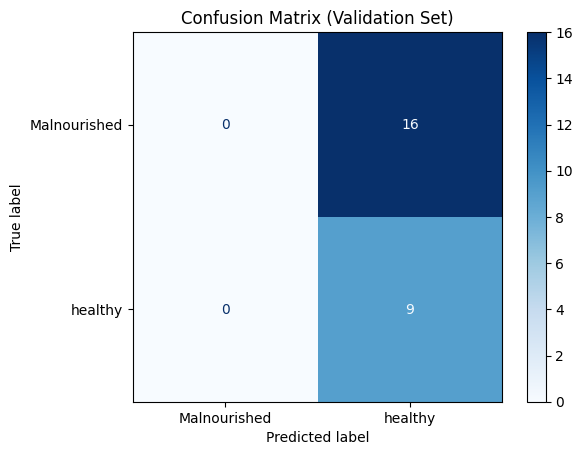

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Function to calculate and display metrics
def evaluate_model(generator, model, dataset_name, batch_size):
    # Generate Predictions
    Y_pred = model.predict(generator, steps=generator.samples // batch_size + 1)
    y_pred = (Y_pred > 0.5).astype(int).flatten()  # Binary classification
    y_true = generator.classes

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Metrics Calculation
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Print Metrics
    print(f"\n{dataset_name} Set Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:")
    print(cm)
    print(f"True Positive (TP): {tp}")
    print(f"False Negative (FN): {fn}")
    print(f"False Positive (FP): {fp}")
    print(f"True Negative (TN): {tn}")

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix ({dataset_name} Set)')
    plt.show()

# Training Set Evaluation
evaluate_model(train_generator, model, "Training", BATCH_SIZE)

# Validation Set Evaluation
evaluate_model(valid_generator, model, "Validation", BATCH_SIZE)


In [ ]:
import os
print(os.getcwd())  # Prints the current working directory


/content


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('malnutrition_alexnet_model.h5')


In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict images in a directory
def predict_images_in_directory(directory_path):
    for subdir in os.listdir(directory_path):
        subdir_path = os.path.join(directory_path, subdir)
        if os.path.isdir(subdir_path):  # Check if it's a folder
            for img_file in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, img_file)
                if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check if it's an image file
                    # Load and preprocess the image
                    img = image.load_img(img_path, target_size=(227, 227))
                    img_array = image.img_to_array(img)
                    img_array = np.expand_dims(img_array, axis=0)
                    img_array /= 255.0

                    # Make the prediction
                    prediction = model.predict(img_array)

                    # Check prediction and print the result
                    print(f"Image: {img_file} - Prediction: {'Malnourished' if prediction >= 0.5 else 'Healthy'}")

# Predict on images in both the train and valid directories
train_dir = '/content/path_to_train_data'  # Update with actual path to train data
valid_dir = '/content/path_to_valid_data'  # Update with actual path to valid data

print("Predicting on Train Data...")
predict_images_in_directory(train_dir)

print("Predicting on Valid Data...")
predict_images_in_directory(valid_dir)


Predicting on Train Data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Image: Screenshot-2024-10-30-153405_png.rf.dbc4f014e6c9c2073d4ddd43c50de2ce.jpg - Prediction: Malnourished
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Image: Screenshot-2024-10-30-153450_png.rf.7bcecf4adcafb28fcc1eb4a8c6cfb658.jpg - Prediction: Malnourished
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image: Screenshot-2024-11-04-132456_png.rf.2f2685ad5f4dc44378a751932811164f.jpg - Prediction: Malnourished
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Image: Screenshot-2024-10-30-153844_png.rf.e55892d9e71f08582fa37a371c4f61ef.jpg - Prediction: Malnourished
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Image: Screenshot-2024-11-04-154551_png.rf.953675725d642e4cf7fb4e30028ccf86.jpg - Prediction: Malnourished
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image: Screenshot-2024-10-30-153450_png.rf.0030d32e62c717389884c1c04faab793.jpg - Prediction: Malnourished
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Image: Screenshot-2024-11-04-151345_png.rf.9f16faf7295dc86a5411